# Generic Feature Reduction - Diabetes Patients

import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_columns', None)

In [2]:
# Read in the integrated Data Files 
df_Patient = pd.read_excel("C:/Users/josep/documents/datasets/AIHS_Patient.xlsx",nrows=10000)
df_Patient.head()

,Index,Year,Patient Ordinal,Birth Date,Age,Decade,Gender,Race,Race Category,Diabetes,Diabetic Metabolic Syndrome,ADA Risk,Family Member with Diabetes,Physical Activity Minutes,Activity Level,High Blood Pressure Response,High Blood Pressure,Height in Inches,Height in Centimeters,Patients weight in lbs,Weight in KG,BMI,BMI Class,ADA Family Risk,ADA Age Risk,ADA Gender Risk,ADA BMI Risk,ADA Hypertension Risk,Total Calculated ADA pre-Diabetes Risk,AIHS Age Risk,AIHS BMI Risk,Total Calculated AIHS Risk Stratifcation,Simulated BMI Class,Simulated Activity Class,Patient Cohort,Number of Claims,Emergency Department Visit count,Inpatient Admission count,Institutional Claim Count,Professional Claim Count,Pharmacy Claim Count,Dental Claim Count,Total Paid Amount,Per Patient Per Year Amount,Per Patient Per Month Amount,Per Patient Per Year Utilization,Per Patient Per Month Utilization,Alternative ED Visit Claim Count,Alternative IP Admission Claim Count,Number of Endocrine Nutritional Metabolic Immunity Disorders Claims,Number of Congenital Anomalies Claims,Number of Genitourinary System Claims,Number of Symptoms Signs Ill Defined Conditions Claims,Number of Circulatory System Claims,Number of Respiratory System Claims,Number of Diseases of the Blood Claims,Number of Infectious and parasitic diseases Claims,Number of Mental Illness Claims,Number of Neoplasms Claims,Number of Diseases of the Nervous System Claims,Number of Diseases of the Digestive System Claims,Number of Diseases of the Musculoskeletal System Claims,Number of Injury and Poisoning Claims,Number of Residual Codes Unclassified Claims,Number of Complications of Pregnancy Childbirth Claims,Number of Perinatal Period Claims,Number of Diseases of the Skin Claims,Patient Ordinal.1,Weight Current,Weight Period 1,Weight Period 2,Weight Period 3,Weight Period 4,Weight Period 5,HBA1c Period 5,BP Diastolic Current,BP Diastolic Period 1,BP Diastolic Period 2,BP Diastolic Period 3,BP Diastolic Period 4,BP Diastolic Period 5,BP Systolic Current,BP Systolic Period 1,BP Systolic Period 2,BP Systolic Period 3,BP Systolic Period 4,BP Systolic Period 5,LDL Current,LDL Period 1,LDL Period 2,LDL Period 3,LDL Period 4,LDL Period 5,HDL Current,HDL Period 1,HDL Period 2,HDL Period 3,HDL Period 4,HDL Period 5,BRFSS Index,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,"MEDCOST Was there a time during the past 12 months when you needed to see a doctor, but could not because of the cost? ? 1=Yes 2=No 7=DK/Not sure 9=Refused",CHECKUP1,CHECKUP1 About how long has it been since you last visited a doctor for a routine checkup? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,BPHIGH4,"BPHIGH4 Have you ever been told by a doctor, nurse, or other health professional that you have high blood pressure?? 1=Yes 2=No 7=DK/Not sure 9=Refused",BPMEDS,BPMEDS Are you currently taking medicine for your high blood pressure? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,BLOODCHO,BLOODCHO Blood cholesterol is a fatty substance found in the blood. Have you ever had your blood cholesterol checked? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CHOLCHK,CHOLCHK Ever told you have Cardiovascular Disease/Heart Attack and Stroke ? 1=Yes 2=No 7=DK/Not sure 9=Refused,TOLDHI2,TOLDHI2 Ever told blood cholesterol is high? ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CVDINFR4,"CVDINFR4 Ever told you have heart attack, also called a myocardial infarction ? 1=Yes 2=No 7=DK/Not sure 9=Refused",CVDCRHD4,CVDCRHD4 Ever told you have angina or coronary heart disease ? 1=Yes 2=No 7=DK/Not sure 9=Refused,CVDSTRK3,CVDSTRK3 Ever told you have Stroke ? 1=Yes 2=No 7=DK/Not sure 9=Refused,ASTHMA3,ASTHMA3 Ever told you have Asthma ? 1=Yes 2=No 7=DK/Not sure 9=Refused,ASTHNOW,ASTHNOW Do you still have asthma? 1=Yes 2=No 7=DK/Not sure 9=Refused,CHCSCNCR,CHCSCNCR (Ever told) yo

In [ ]:
# Read in the mushroom dataset
df_shroom = pd.read_csv("C:/Users/josep/documents/datasets/mushrooms.csv",nrows=10000)
df_shroom.head()

In [ ]:
df_shroom.shape

In [11]:
# Random Forest 81% Accuracy 
df_Patient_Demographic = df_Patient[['Age','High Blood Pressure','BMI Class','Gender','Activity Level','Diabetes']]
df_Patient_Demographic.head()

,Age,High Blood Pressure,BMI Class,Gender,Activity Level,Diabetes
0,49,1,Morbidly Obese,Male,0,0
1,73,0,Overweight,Male,0,0
2,49,0,Healthy Weight,Male,0,0
3,87,1,Overweight,Female,0,0
4,87,0,Healthy Weight,Male,0,0


In [19]:
# Random Forest 83% Accuracy 
df_Patient_Demographic = df_Patient[[ 'Age','High Blood Pressure','Decade','Gender','Activity Level','Diabetes']]
df_Patient_Demographic.head()

,Age,High Blood Pressure,Decade,Gender,Activity Level,Diabetes
0,49,1,4,Male,0,0
1,73,0,7,Male,0,0
2,49,0,4,Male,0,0
3,87,1,8,Female,0,0
4,87,0,8,Male,0,0


In [ ]:
df_Patient_Demographic = df_Patient[[ 'Age', 'Decade', 'Activity Level','Diabetes']]
df_Patient_Demographic.head()

In [20]:
# One hot Encode all category variables
X = df_Patient_Demographic.drop(['Diabetes'], axis = 1)
Y = df_Patient_Demographic['Diabetes']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)


In [ ]:
# One hot Encode all category variables
X = df_shroom.drop(['class'], axis = 1)
Y = df_shroom['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)


In [21]:
# forest Test 
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [22]:
forest_test(X, Y)

1.625
[[2467   41]
 [ 478   14]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2508
           1       0.25      0.03      0.05       492

    accuracy                           0.83      3000
   macro avg       0.55      0.51      0.48      3000
weighted avg       0.74      0.83      0.76      3000



In [23]:
# Primary Compenent Analysis 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df_Patient_Demographic['Diabetes']], axis = 1)
PCA_df['Diabetes'] = LabelEncoder().fit_transform(PCA_df['Diabetes'])
PCA_df.head()

,PC1,PC2,Diabetes
0,3.163864,0.783438,0
1,1.045763,-1.185476,0
2,3.161247,0.760523,0
3,-1.823343,0.064143,0
4,0.101008,-2.054002,0


In [ ]:
# Primary Compenent Analysis 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

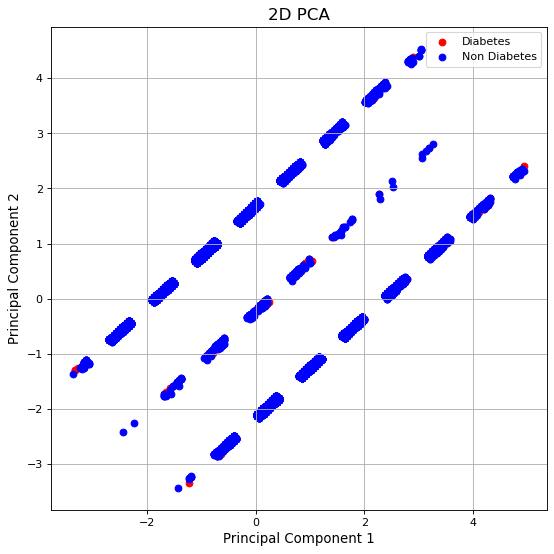

In [24]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Diabetes'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['Diabetes'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Diabetes', 'Non Diabetes'])
plt.grid()

In [ ]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [ ]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

In [ ]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

In [ ]:
forest_test(X_lda, Y)

In [ ]:

from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)

forest_test(X_lle, Y)